# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Access the local file using python code

In [2]:
from google.colab import files
uploaded = files.upload()

Saving df_scaled.csv to df_scaled.csv


# Load the data set

In [3]:
df = pd.read_csv('df_scaled.csv')
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Outlet_No.
0,10107222.0,Batticaloa,-0.347692,-0.308787,0.520598,1,1
1,10149531.0,Batticaloa,-0.347612,-0.211738,0.784676,1,1
2,10389466.0,Batticaloa,-0.347496,-0.367402,0.423406,1,1
3,10596077.0,Batticaloa,-0.347496,-0.271276,0.682146,1,1
4,10244123.0,Batticaloa,-0.347398,-0.301495,0.633288,1,1


# Data types

In [4]:
df.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,int64
Outlet_No.,int64


# Converting data type

In [6]:
# Convert 'cluster_category' to numerical type
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

# Apply label encoding to other categorical features:
from sklearn.preprocessing import LabelEncoder
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = categorical_features[categorical_features != 'cluster_category']
encoders = {}
for feature in categorical_features:
    encoders[feature] = LabelEncoder()
    df[feature] = encoders[feature].fit_transform(df[feature])

# Assigning input and output variables

In [7]:
ind_cols = ['luxury_sales','dry_sales','fresh_sales','Outlet_No.']
x = df[ind_cols] # Features
y = df.cluster_catgeory # Target variable

In [8]:
x

,luxury_sales,dry_sales,fresh_sales,Outlet_No.
0,-0.347692,0.520598,-0.308787,1
1,-0.347612,0.784676,-0.211738,1
2,-0.347496,0.423406,-0.367402,1
3,-0.347496,0.682146,-0.271276,1
4,-0.347398,0.633288,-0.301495,1
...,...,...,...,...
774142,0.212166,0.645924,-0.399838,20
774143,0.212166,0.607649,-0.440558,20
774144,-0.713610,-0.415914,0.402667,20
774145,0.941435,1.127004,-0.230859,20


In [9]:
y

,cluster_catgeory
0,1
1,1
2,1
3,1
4,1
...,...
774142,4
774143,4
774144,2
774145,4


# Bar graph for cluster_catgeory

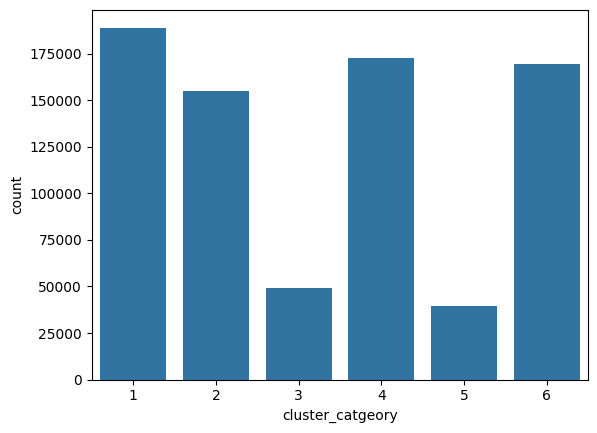

In [10]:
sns.countplot(x='cluster_catgeory', data=df)
plt.show()

# Data Split (70/30)

In [14]:
# Split the dataset in 70% Training and 30% Test with class stratification
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
DecT= DecisionTreeClassifier()
DecT.fit(X_train, y_train)

DecisionTreeClassifier()

# Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score
Y_pred = DecT.predict(X_test)
accuracy_score(y_test, Y_pred)

0.9982173997287347

# Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred)

array([[56597,     0,     9,    86,     0,     3],
       [    3, 46443,     3,     7,     1,    62],
       [    1,     6, 14648,     1,    15,     1],
       [   81,     3,     1, 51639,     4,     4],
       [    3,     8,    22,     8, 11817,     4],
       [    7,    57,     6,     4,     4, 50687]])

# Classification report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56695
           2       1.00      1.00      1.00     46519
           3       1.00      1.00      1.00     14672
           4       1.00      1.00      1.00     51732
           5       1.00      1.00      1.00     11862
           6       1.00      1.00      1.00     50765

    accuracy                           1.00    232245
   macro avg       1.00      1.00      1.00    232245
weighted avg       1.00      1.00      1.00    232245



# Decision Tree

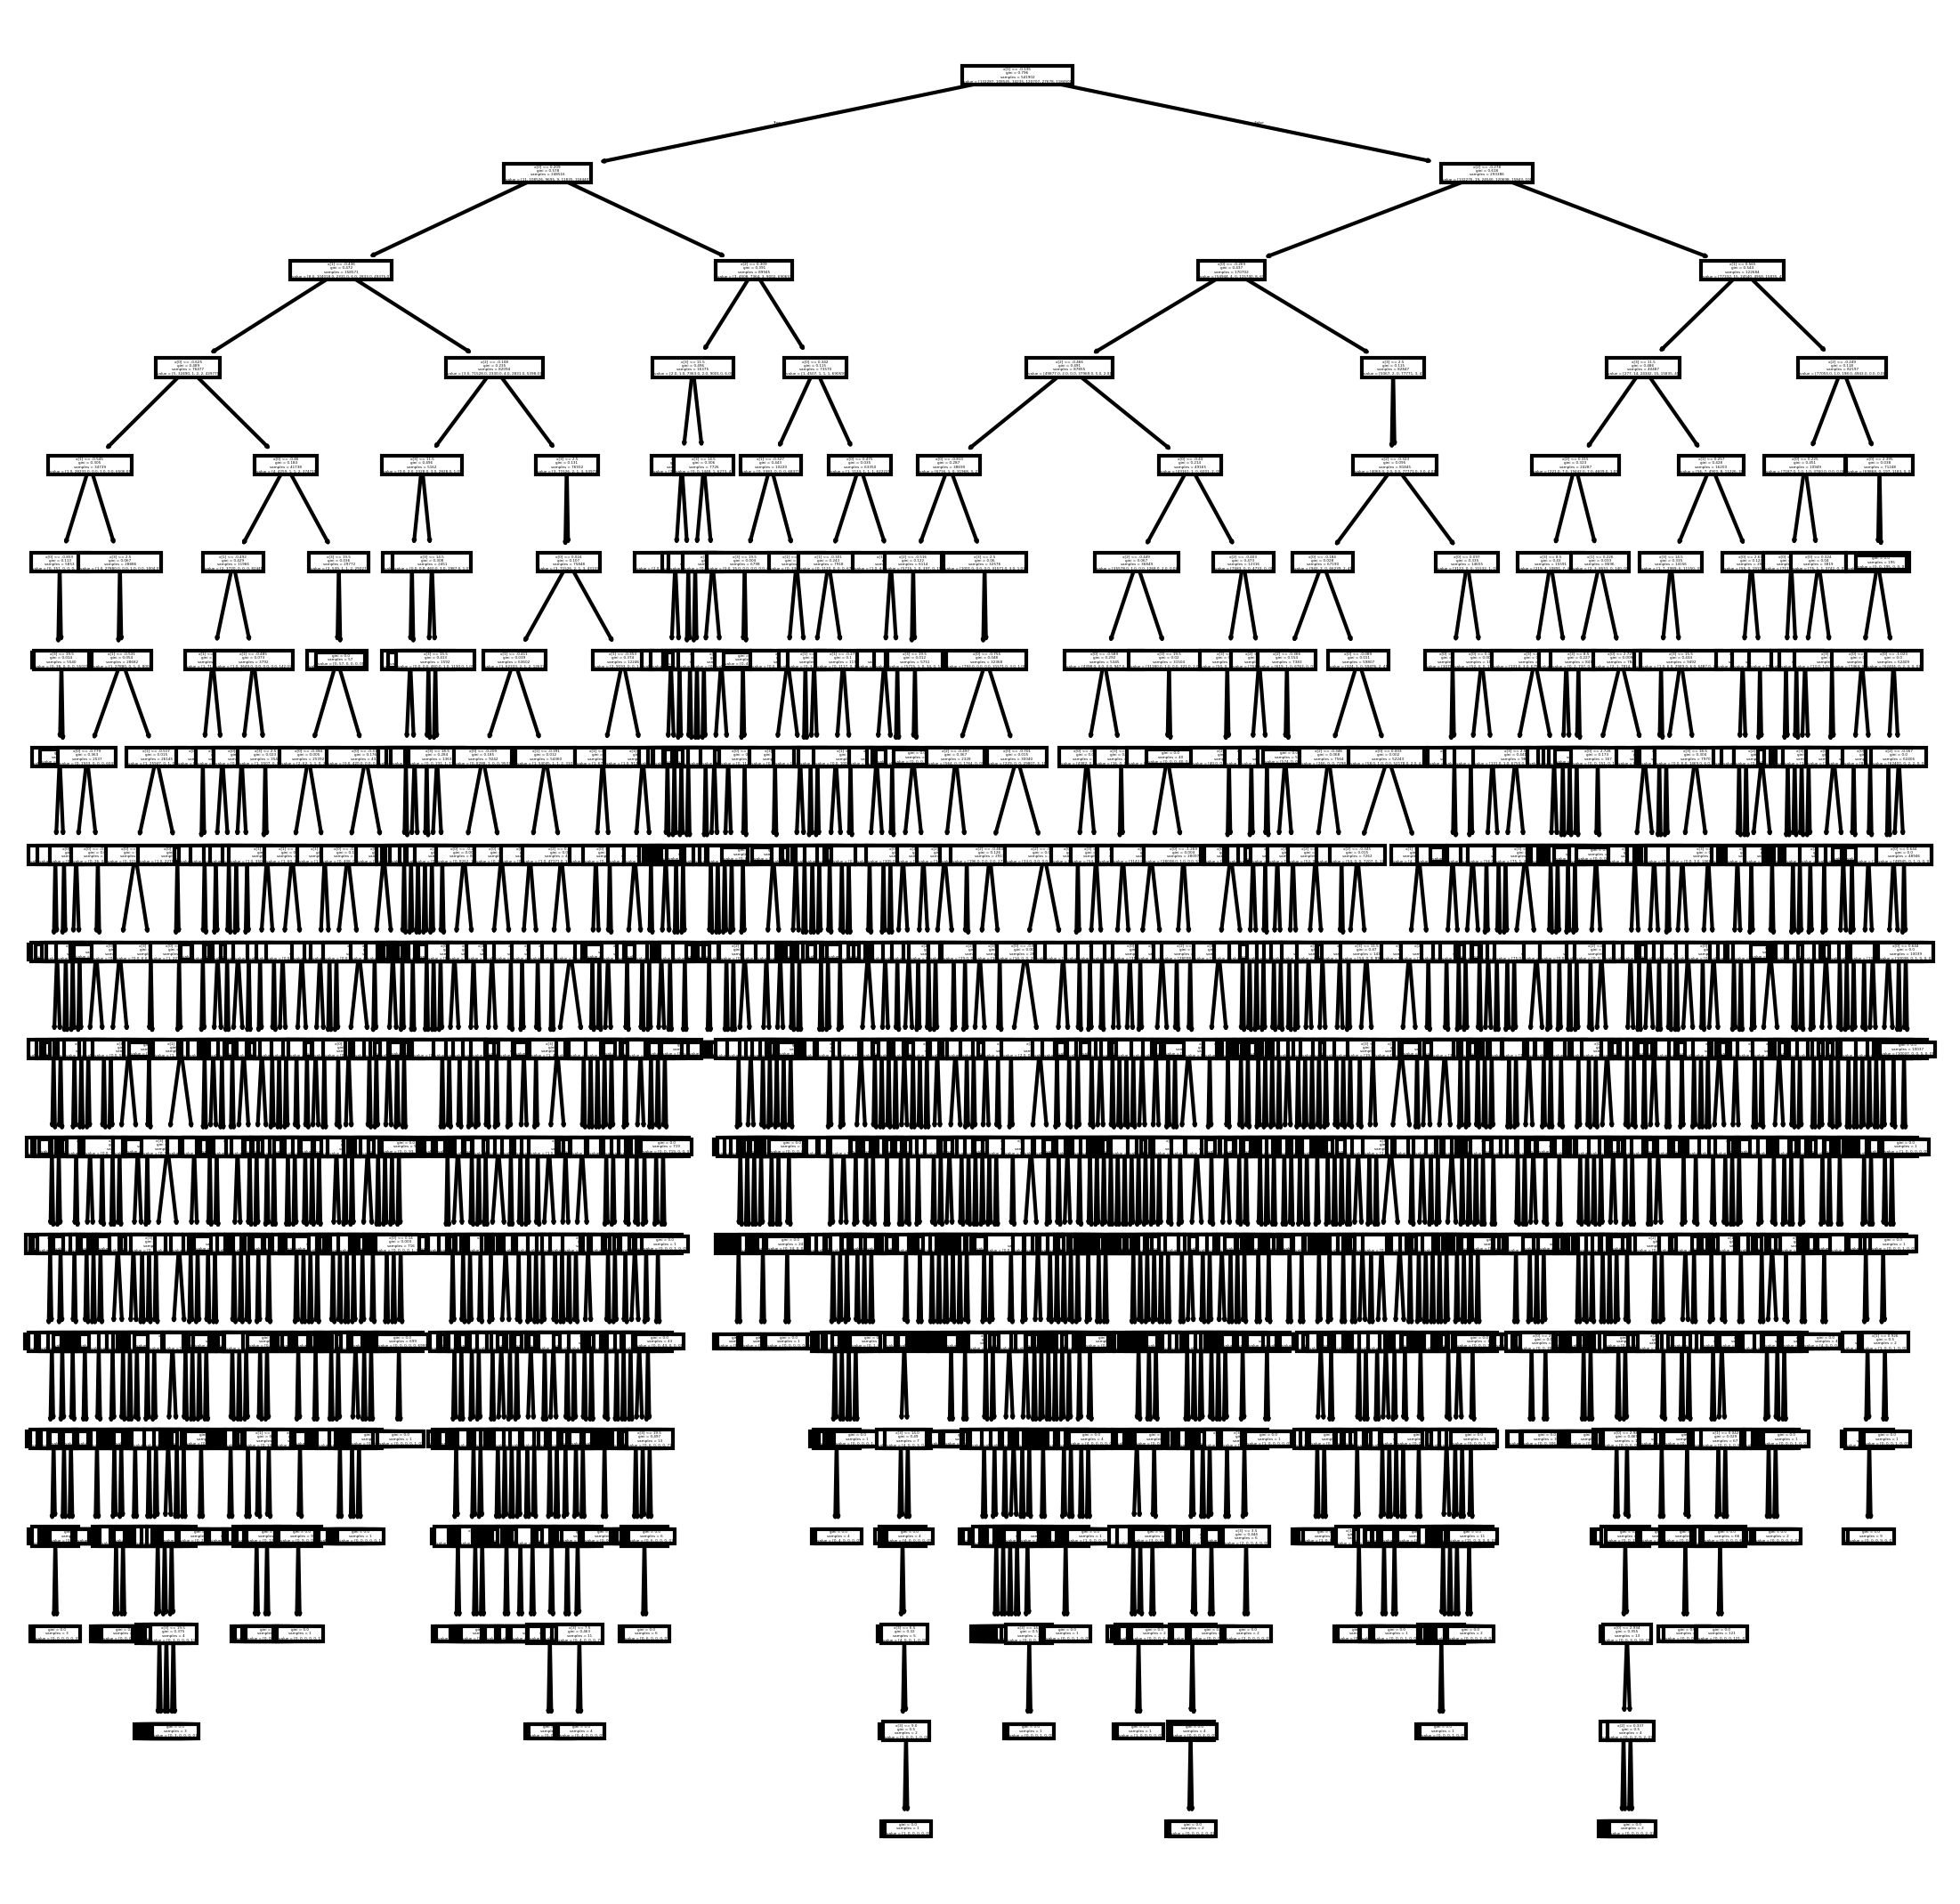

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9), dpi=300)
tree.plot_tree(DecT)
plt.show()